In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

If in case it is not run check kernal at right up side it is Python 3.9.. or not, and download Envoirment Using PIP 

get the data and preprocess it

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def plot_input_img(i):
    plt.imshow(x_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

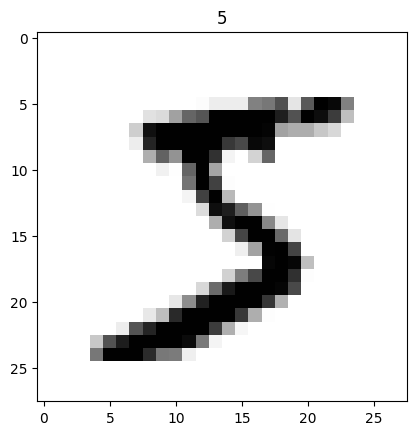

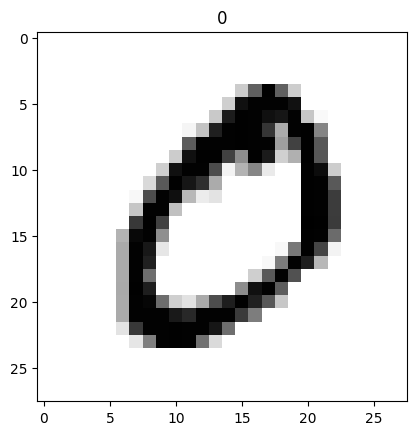

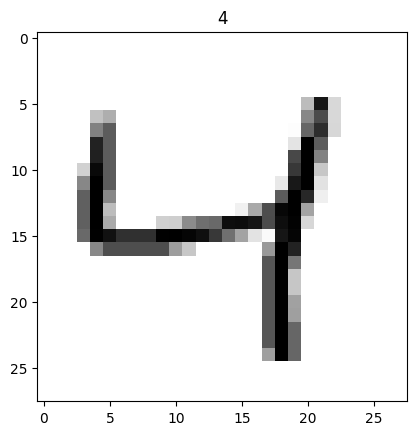

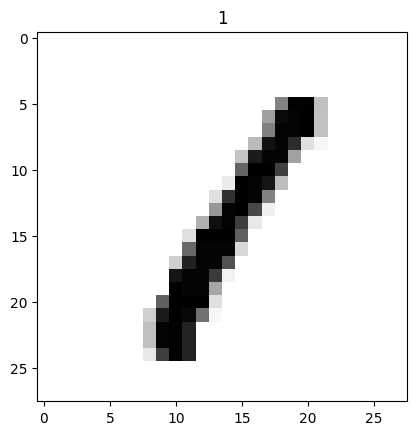

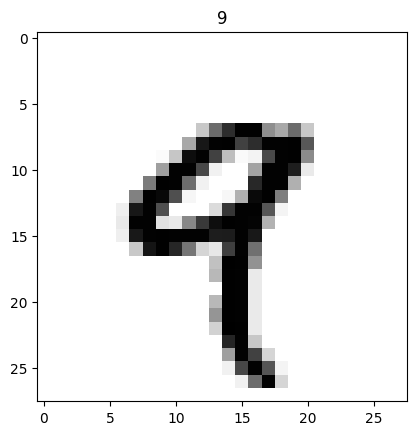

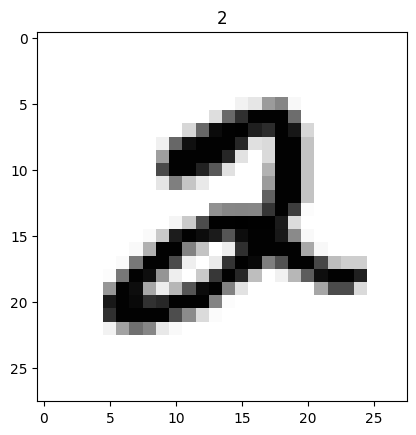

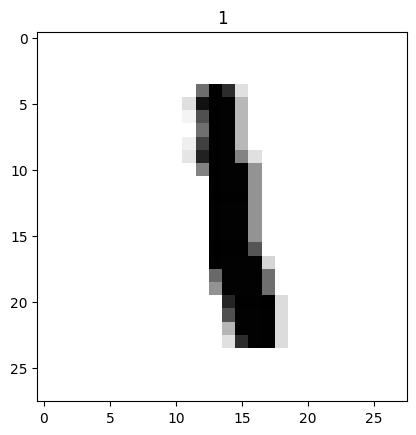

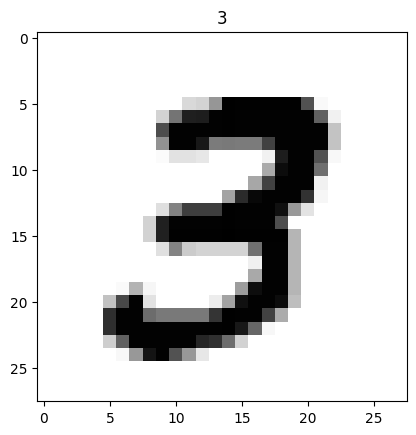

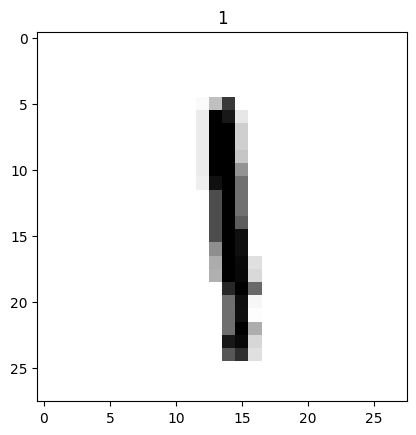

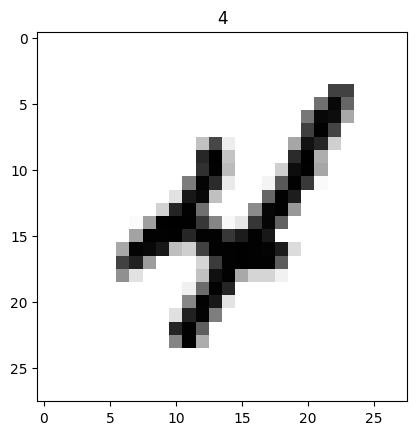

In [4]:
for i in range(10):
    plot_input_img(i)

In [5]:
# Pre process the images

# normalizing the image to [0,1] range

x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

# Reshap / expand the dimentions of images to (28,28,1)

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_train,-1)

# convet classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [6]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape =(28,28,1), activation='relu'))
model.add(MaxPool2D(2,2))


model.add(Conv2D(64,(3,3) , activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation=("softmax")))


c:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Callback
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStopping
es = EarlyStopping(monitor='val_acc',min_delta=0.01, patience=4, verbose=1)

#model check point

mc=ModelCheckpoint('./bestmodel.h5',monitor="val_acc",verbose=1,save_best_only=True)

cb=[es,mc]

In [9]:
model.compile(optimizer='adam',loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model Training


In [ ]:
his = model.fit(x_train,y_train, epochs=50, validation_split=0.3)
model.save('Handwritten-Digit-Recognition-Neural-Network-Python-Project\handwritten.h5')

In [10]:
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (60000, 28, 28, 1, 1)
y_test shape: (10000, 10)


In [11]:
min_samples = min(x_test.shape[0], y_test.shape[0])
x_test = x_test[:min_samples]
y_test = y_test[:min_samples]

In [17]:
score = model.evaluate(x_test, y_test)

print(f"The model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1013 - loss: 2.3104
The model accuracy is 0.09889999777078629
